# Traffic Signs Classifier Project 
Lucas Hagel

## Load Data

In [1]:
import pickle
import time
import pandas as pd

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

    
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

labels_file = "signnames.csv"

with open(labels_file, mode = 'r') as ofo:
    classes = pd.read_csv(ofo)
num_classes = classes.shape[0]

print("Number of classes: {}".format(num_classes))
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))

def bing():
	import pygame
	import time

	pygame.mixer.init()
	soundObj = pygame.mixer.Sound('beep1.ogg')
	soundObj.play()

	time.sleep(2)
	soundObj.stop()

Number of classes: 43
Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


We plot the number of each labels in the training set to get a distribution, we quickly notice almost half of the samples have under 500 training images.

180


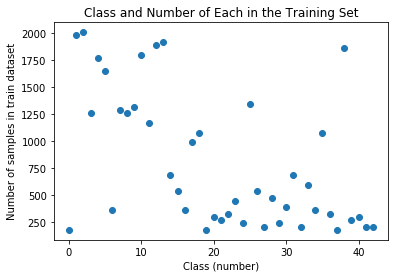

In [2]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

#class labels in a numpy array
signs_np_array = classes.as_matrix()

count = Counter(y_train)
x = [i for i in range(num_classes)]
x_arr = [count[i] for i in range(43)]

plt.xlabel("Class (number)")

plt.ylabel("Number of samples in train dataset")
plt.title("Class and Number of Each in the Training Set")
plt.scatter(x,x_arr)
print(count[0])

## Visualize Data

View a sample from the dataset.

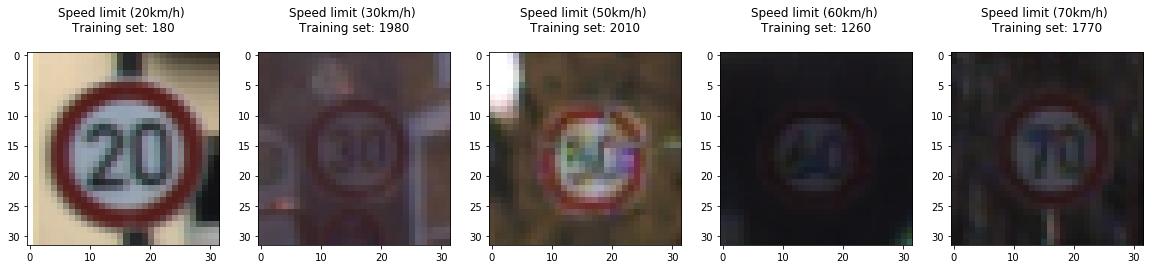

In [3]:
import random
import numpy as np

plt.figure(figsize=(20, 25))

x = [i for i in range(num_classes)]
x_arr = [count[i] for i in range(num_classes)]

# gets the actual name of the image in question
def get_sign_label(index):
    for sign in signs_np_array:
        if sign[0] == index:
            return sign_class[1]
    return('Index not found')

for class_label in range(5):
    sign_class_id = signs_np_array[class_label, 0]     
    
    pic_id = None
    for i in range(len(y_train)):
        if y_train[i] == class_label:
            pic_id = i
            break
    
    label_actual_title = None
    for sign in signs_np_array:
        if sign[0] == class_label:
            label_actual_title = sign[1]    
   
    # + 1 is because it's a column number not zero indexed 
    plt.subplot(1, 5, class_label + 1)    
    title = "{0} \nTraining set: {1}\n".format(
        label_actual_title,        
        count[ class_label ])
    plt.title(title, wrap=True)
    plt.imshow(X_train[pic_id])
    
#Auto layout
#plt.tight_layout()
#plt.savefig('first-few-signs.png')


## Preprocess Data

Shuffle the training data.

In [4]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Grayscale

In [5]:
import cv2
# Convert RGB to Grayscale:
def convert_to_grayscale(X_data):
    gray_img = []
    for i in range(0, len(X_data)):
        image = cv2.cvtColor(X_data[i], cv2.COLOR_RGB2GRAY)
        gray_img.append(image)
    X_data = np.reshape(gray_img, (-1, 32, 32, 1))
    return X_data

X_train = convert_to_grayscale(X_train)
X_valid = convert_to_grayscale(X_valid)
X_test = convert_to_grayscale(X_test)

### Normalize the dataset: 

In [6]:
def vecI(vec):
    return (vec-128.)/128

X_train = [vecI(i) for i in X_train ]
X_valid = [vecI(i) for i in X_valid ]
X_test = [vecI(i) for i in X_test ]

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [7]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 256

## TODO: Implement LeNet-5
This architecture is based on the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.


### Input
This architecture accepts 32x32x3 images as input.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [8]:
from tensorflow.contrib.layers import flatten

def LeNet(x,keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1    
    
    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16.
    
    # 6 to 64
    weight_layer_1 = tf.Variable(tf.truncated_normal((5,5, 1, 32),mu,sigma))
    bias_1 = tf.Variable(tf.zeros(32))
    #Activation.
    layer_1 = tf.nn.conv2d(x, weight_layer_1, [1,1,1,1], padding='VALID') + bias_1
    layer_1 = tf.nn.relu(layer_1)
    
    #Pooling. Input = 28x28x16. Output = 14x14x16.   
    # can also do stride = 2 with padding SAME 
    
    layer_1 = tf.nn.max_pool(layer_1,
                             ksize=[1, 2,2, 1],
                             strides=[1, 2,2, 1],
                           padding='VALID')
    
    
    #Layer 2: Convolutional. Output = 10x10x32.
    
    weight_layer_2 = tf.Variable(tf.truncated_normal((5,5, 32, 64),mu,sigma))
    bias_2 = tf.Variable(tf.zeros(64))
    layer_2 = tf.nn.conv2d(layer_1, weight_layer_2, 
                           strides=[1, 1, 1, 1], padding='VALID') + bias_2
    layer_2 = tf.nn.relu(layer_2)
    
    #Pooling. Input = 10x10x32. Output = 5x5x32.
    layer_2 = tf.nn.max_pool(layer_2,
                             ksize=[1, 2,2, 1],
                             strides=[1,2,2, 1],
                            padding='VALID')
    
    # Flatten. Input = 5x5x32. Output = 800.  
    
    layer_2 = flatten(layer_2)  
    #t = input()
    
    #Layer 3: Fully Connected. Input = 400. Output = 120.
    
    weight_layer_3 = tf.Variable(tf.truncated_normal((1600,400),mu,sigma))
    bias_3 = tf.Variable( tf.zeros(400) )
    l3_fc1 = tf.matmul(layer_2, weight_layer_3) + bias_3
    
    l3_fc1 = tf.nn.dropout(l3_fc1,keep_prob)
    
    #Activation.
    l3_fc1 = tf.nn.relu(l3_fc1)
    
    #Layer 4: Fully Connected. Input = 120. Output = 84.
    weight_layer_4 = tf.Variable(tf.truncated_normal((400,84),mu,sigma))
    bias_4 = tf.Variable(tf.zeros(84))
    l4_fc2 = tf.matmul(l3_fc1, weight_layer_4) + bias_4
    
    #Activation.
    l4_fc2 = tf.nn.dropout(l4_fc2,keep_prob)
    l4_fc2 = tf.nn.relu(l4_fc2)   
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    weight_layer_5 = tf.Variable(tf.truncated_normal((84,43),mu,sigma))
    bias_5 = tf.Variable(tf.zeros(43))    
    logits = tf.matmul(l4_fc2, weight_layer_5) +  bias_5
    # TODO: Activation.
    
    return logits



## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

## Training Pipeline


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.0005

logits = LeNet(x,keep_prob)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)ds

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, keep_proba):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy, loss = sess.run([accuracy_operation, loss_operation], feed_dict={x: batch_x, y: batch_y, keep_prob : keep_proba})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return (total_accuracy / num_examples, total_loss / num_examples)

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [10]:
import time

start = time.time()
valid_accuracy_arr = []
loss_arr = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : .5})
            
        validation_accuracy = evaluate(X_valid, y_valid,1)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}, loss = {:.3f}".format(validation_accuracy[0], validation_accuracy[1]))
        print()
        valid_accuracy_arr.append(validation_accuracy[0])
        loss_arr.append(validation_accuracy[1])
        
    saver.save(sess, './lenet')
    print("Model saved")
fina = time.time()
print("it took", (fina-start)," to train")

Training...

EPOCH 1 ...
Validation Accuracy = 0.431, loss = 2.262

EPOCH 2 ...
Validation Accuracy = 0.755, loss = 1.003

EPOCH 3 ...
Validation Accuracy = 0.840, loss = 0.595

EPOCH 4 ...
Validation Accuracy = 0.885, loss = 0.426

EPOCH 5 ...
Validation Accuracy = 0.898, loss = 0.356

EPOCH 6 ...
Validation Accuracy = 0.923, loss = 0.282

EPOCH 7 ...
Validation Accuracy = 0.939, loss = 0.228

EPOCH 8 ...
Validation Accuracy = 0.938, loss = 0.213

EPOCH 9 ...
Validation Accuracy = 0.949, loss = 0.182

EPOCH 10 ...
Validation Accuracy = 0.949, loss = 0.174

EPOCH 11 ...
Validation Accuracy = 0.955, loss = 0.162

EPOCH 12 ...
Validation Accuracy = 0.950, loss = 0.160

EPOCH 13 ...
Validation Accuracy = 0.950, loss = 0.163

EPOCH 14 ...
Validation Accuracy = 0.961, loss = 0.143

EPOCH 15 ...
Validation Accuracy = 0.961, loss = 0.127

EPOCH 16 ...
Validation Accuracy = 0.960, loss = 0.128

EPOCH 17 ...
Validation Accuracy = 0.967, loss = 0.118

EPOCH 18 ...
Validation Accuracy = 0.963, lo

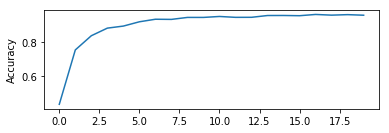

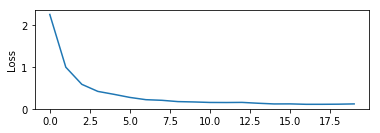

In [11]:
'''
All data and 2 epochs took 62 seconds
'''

plt.figure(1)
plt.subplot(211)
plt.plot(valid_accuracy_arr)
plt.ylabel('Accuracy')
plt.show()

plt.figure(1)
plt.subplot(212)
plt.plot(loss_arr)
plt.ylabel('Loss')
plt.show()

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test,1)
    print("Test Accuracy = {:.3f}".format(test_accuracy[0]))
bing()

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.946
